# WARG CV BOOTCAMP

## Imports

In [25]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from Functions import *

print(tf.__version__)

2.7.0


## Resolving Invalid Certificate Error

In [18]:
# from github - https://github.com/pytorch/pytorch/issues/33288

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

# Loading Data and Normalization

In [19]:
xTrain, yTrain, xTest, yTest = load_normalize_categorize_data()

# Print pixel values of training and testing data
print(f"Training Data: {xTrain.shape}")
print(f"Testing Data: {xTest.shape}")


Training Data: (50000, 32, 32, 3)
Testing Data: (10000, 32, 32, 3)


## Building the Sequential Model

#### Defining Model Constants

In [21]:
# Convolutional Layer Variables
FILTERS = [32, 64, 128]
KERNEL_SIZE = (3,3)
ACTIVATION_R = "relu"
PADDING = "same"
INPUT_SHAPE = (32,32,3)
DROPOUT_FACTOR = 0.2
POOL_SIZE = (2,2)

# Dense Layer w Softmax Activation Variable
ACTIVATION_S = "softmax"
UNITS = [128, 10]

#### Building Model

In [26]:
model = build_model(FILTERS, KERNEL_SIZE, ACTIVATION_R, PADDING, INPUT_SHAPE, DROPOUT_FACTOR, POOL_SIZE, UNITS, ACTIVATION_S)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 64)         

#### Compiling Model

In [23]:
model.compile(
   loss="categorical_crossentropy",
   optimizer="adam",
   metrics=["accuracy"]
)

## Training (Fitting) & Evaluation of Model

#### Defining Fitting Constants 

In [24]:
BATCH_SIZE = 32
EPOCHS = 20

In [12]:
# print(x_train)
# print(y_train)

training = model.fit(xTrain, yTrain, batch_size = BATCH_SIZE, epochs = EPOCHS)

Epoch 1/20
1563/1563 [==============================] - 52s 33ms/step - loss: 1.7427 - accuracy: 0.3659
Epoch 2/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4004 - accuracy: 0.5013
Epoch 3/20
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2684 - accuracy: 0.5509
Epoch 4/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1704 - accuracy: 0.5886
Epoch 5/20
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1138 - accuracy: 0.6099
Epoch 6/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0668 - accuracy: 0.6253
Epoch 7/20
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0231 - accuracy: 0.6414
Epoch 8/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9882 - accuracy: 0.6519
Epoch 9/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9580 - accuracy: 0.6645
Epoch 10/20
1563/1563 [==============================] - 47s 30m

#### Evaluating Model

In [13]:
valLoss, valAccuracy = model.evaluate(xTest, yTest)

313/313 [==============================] - 3s 9ms/step - loss: 0.8256 - accuracy: 0.7209


## Plotting Graphs

#### Defining Plot Variables

In [14]:
loss = training.history['loss']
accuracy = training.history['accuracy']
epochs = [i+1 for i in range(len(loss))]

#### Plotting Graphs

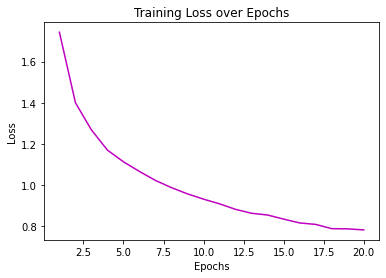

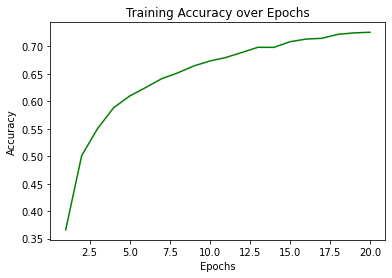

In [15]:
plot_graph(x=epochs, y=loss, fmt="-m", title="Training Loss over Epochs", xLabel="Epochs", yLabel="Loss")
plot_graph(x=epochs, y=accuracy, fmt="-g", title="Training Accuracy over Epochs", xLabel="Epochs", yLabel="Accuracy")

## Summary of Model

In [16]:
print(f"Training Loss: {loss[-1]}")
print(f"Training Accuracy: {accuracy[-1]}")
print("--------------------------------------")
print(f"Validation Loss: {valLoss}")
print(f"Validation Accuracy: {valAccuracy}")


Training Loss: 0.7831885814666748
Training Accuracy: 0.7258999943733215
--------------------------------------
Validation Loss: 0.8255831003189087
Validation Accuracy: 0.7208999991416931
